In [1]:
import pandas as pd
import numpy as np
# from scipy import signal
# from scipy.stats import entropy
from matplotlib import pyplot as plt
%matplotlib inline

In [64]:
def data_generator(ts_length = 400, points_to_skip = 48, random_seed = None, cp_prob = 1, is_multiplicative = True):
    if random_seed:
        np.random.seed(random_seed)
        
    signal = np.cos(2*np.pi/24 * np.arange(0, ts_length) + (np.pi/2))
    noise = np.random.normal(0,0.1,ts_length)
    signal = signal+noise

    change_point = np.random.choice(np.arange(points_to_skip,ts_length),1)[0]
    change_point = np.random.choice([None,change_point],1,p=[1-cp_prob,cp_prob])[0]
    change_point_value = np.random.normal(0.5,0.1,1)*np.random.choice([-1,1],1,)[0]
    if is_multiplicative:
        change_point_mult_value = 1+change_point_value
    else:
        change_point_mult_value = 1
    
    if change_point:
        signal[change_point:] = (signal[change_point:]+change_point_value) * change_point_mult_value
    else:
        change_point_value = None
    return([signal, change_point, change_point_value])

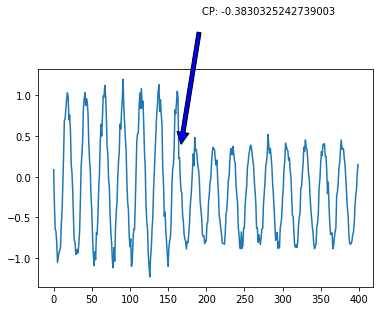

In [43]:
generated = data_generator(is_multiplicative = True)
plt.plot(generated[0])
plt.annotate('CP: {}'.format(generated[2][0]), xy=(generated[1], generated[0][generated[1]]), xytext=(generated[1]+30, 2), arrowprops=dict(facecolor='blue', shrink=0.1))
plt.show()


In [ ]:
# def cp_quality(actual, predicted):
#     if actual & predicted:
        
#     len_a, len_p = len(actual), len(predicted)
#     allocated_quality = len_p/len_a
#     min_a_p = min(len_a,len_p)
    
#     distance_list = []
#     for act in actual:
#         for pred in predicted:
#             distance_list.append(abs(pred - act)/T)
            
#     distance_list.sort()
#     changepoint_quality = sum(distance_list[0:min_a_p])
#     return(round(changepoint_quality,4), round(allocated_quality,2))

#     return()